<a href="https://colab.research.google.com/github/Abudhagir/Abudhagir/blob/main/Assignment_2_5_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import MNIST
from torch.optim import Adam
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import argparse
import torch
import time

In [ ]:
import torch
import torch.nn.functional as Fun
A = torch.tensor([3, 4, 5, 0, 1, 2])
output = Fun.one_hot(A, num_classes = 7)
print(output)

tensor([[0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]])


In [ ]:
from numpy.core.numeric import binary_repr
import numpy as np

lr = np.arange(22)

for label in range(22):
    one_hot = (lr==label).astype(np.int)
    binary_re = np.binary_repr(label)
    print("label: ", label, " in one-hot representation: ", one_hot, "binary:", binary_re)

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] binary: 0
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] binary: 1
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] binary: 10
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] binary: 11
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] binary: 100
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] binary: 101
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] binary: 110
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] binary: 111
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] binary: 1000
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] binary: 1001
label:  10  in one-hot representat

<ipython-input-8-2c33e60c8bb3>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_hot = (lr==label).astype(np.int)


In [1]:
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms

In [2]:
import torch.nn.functional as F
import torch.optim as optim

In [3]:
train_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=32
    ,shuffle=True
)

In [ ]:
next(iter(train_loader))[1]

tensor([1, 6, 4, 9, 6, 1, 0, 0, 7, 4, 9, 0, 1, 8, 2, 4, 4, 5, 5, 8, 5, 9, 6, 0,
        2, 2, 3, 3, 0, 1, 1, 5])

In [5]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [ ]:
len(train_set)

60000

In [ ]:
train_set.train_labels

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5, 0, 4,  ..., 5, 6, 8])

In [6]:
sample = next(iter(train_set))

len(sample)

2

In [7]:
image, label = sample

label: 5


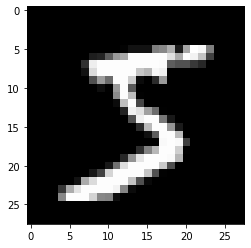

In [10]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [11]:
batch = next(iter(train_loader))

len(batch), type(batch)

(2, list)

In [12]:
image, label = batch


In [13]:
image.shape, label.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

labels: tensor([6, 7, 1, 4, 5, 4, 1, 7, 5, 4, 3, 3, 3, 0, 9, 2, 8, 5, 1, 7, 8, 0, 8, 5, 3, 9, 2, 6, 1, 5, 7, 7])


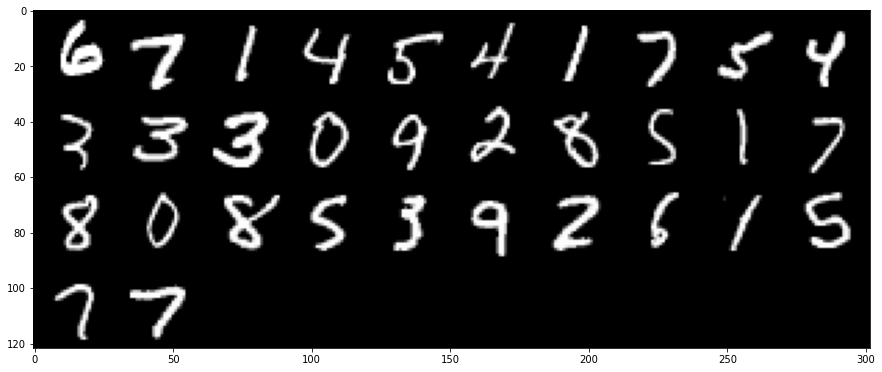

In [14]:
grid = torchvision.utils.make_grid(image, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', label)

In [15]:
import torch.nn as nn

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = None

  def forward(self, t):
    t = self.layer(t)
    return t

In [16]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    # input 28 # output 24 # receptive_field = 5
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) 
    # input 24 # output 20 # receptive_field = 9
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    # input 12x20x20, output 120
    # input 10*512
    self.fc1 = nn.Linear(in_features=12*20*20, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
  
  def forward(self, t):
    return t

In [17]:
network = Network()

print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=4800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [18]:
for name, param in network.named_parameters():
  print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 4800])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


In [19]:
import torch.optim as optim

torch.set_grad_enabled(True)

In [20]:

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) 
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
  
  def forward(self, t):
    # input layer
    x = t

    # conv1 layer
    x = self.conv1(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 28 | 24 | 12

    # conv2 layer
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 12 | 8 | 4 >> 12x4x4

    # reshapre
    x = x.reshape(-1, 12 * 4 * 4)

    # fc1 layer
    x = self.fc1(x)
    x = F.relu(x)

    # fc2 layer
    x = self.fc2(x)
    x = F.relu(x)

    # output layer
    x = self.out(x)
    # x = F.softmax(x, dim=1)
    return x

In [ ]:
torch.set_grad_enabled(False)

In [21]:
sample = next(iter(train_set)) 
image, label = sample
image.shape, image.unsqueeze(0).shape

(torch.Size([1, 28, 28]), torch.Size([1, 1, 28, 28]))

In [22]:
network = Network()

In [23]:
pred = network(image)

In [24]:
pred = network(image.unsqueeze(0))

In [25]:
pred, pred.shape, label

(tensor([[-0.0700,  0.0037, -0.0810, -0.0596,  0.0232, -0.0367, -0.0778, -0.0415,  0.0110,  0.0418]],
        grad_fn=<AddmmBackward0>), torch.Size([1, 10]), 5)

In [26]:
F.softmax(pred, dim=1)

tensor([[0.0959, 0.1032, 0.0948, 0.0969, 0.1052, 0.0991, 0.0951, 0.0986, 0.1040, 0.1072]], grad_fn=<SoftmaxBackward0>)

In [27]:
data_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=10
)

In [28]:
images, labels = batch

preds = network(images)
preds.shape

torch.Size([32, 10])

In [ ]:
preds.argmax(dim=0)

tensor([75, 84, 56, 82, 52, 64, 91, 31, 56, 65])

In [ ]:
preds.argmax(dim=1).eq(labels)

tensor([False, False, False,  True, False, False,  True, False,  True, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False,  True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False, False,  True, False, False, False, False,
        False, False, False,  True, False, False,  True, False,  True, False, False, False, False,  True,  True, False,
        False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True])

In [29]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item()

2.3020102977752686

In [30]:
print(network.conv1.weight.grad)

None


In [ ]:
import torch.optim as optim

torch.set_grad_enabled(True)

In [31]:
loss.backward()

In [32]:
print(network.conv1.weight.grad)

tensor([[[[-9.0854e-04, -6.4785e-04, -6.1840e-04,  1.2572e-03,  1.6241e-03],
          [-2.1638e-03, -2.1431e-03, -1.3846e-03,  1.0781e-04,  6.9441e-04],
          [-2.7126e-03, -1.7648e-03, -1.9654e-03, -1.0896e-03,  2.4890e-04],
          [-3.6368e-03, -2.5113e-03, -1.8562e-03, -6.9341e-04,  8.6996e-04],
          [-2.5590e-03, -1.5425e-03, -6.4505e-04,  5.7174e-04,  1.2464e-03]]],


        [[[-2.0364e-03, -2.1965e-03, -2.2889e-03, -1.2082e-03, -8.6590e-04],
          [-1.1407e-03, -1.5831e-03, -1.4071e-03, -6.5509e-04,  4.6826e-04],
          [-2.2534e-04, -6.5263e-04, -8.3916e-04, -4.1440e-04,  3.8454e-04],
          [-3.9837e-04, -7.2283e-04, -7.6945e-04,  5.9779e-04,  1.0075e-03],
          [ 3.4876e-04, -5.6831e-04, -9.7526e-05,  1.7219e-03,  1.6616e-03]]],


        [[[ 3.2468e-05, -8.1221e-05,  8.2562e-05, -1.6865e-06, -3.6488e-05],
          [ 1.2490e-04,  1.4197e-04,  1.3480e-05,  2.6738e-04,  3.0039e-04],
          [ 1.7449e-04,  9.4836e-05,  6.1971e-05,  4.8758e-05,  6.10

In [33]:
print(network.conv1.weight.grad.shape)

torch.Size([6, 1, 5, 5])


In [34]:
optimizer = optim.Adam(network.parameters(), lr = 0.01)

In [37]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [38]:
get_num_correct(preds, labels)

6

In [39]:
loss.item(), get_num_correct(preds, labels)

(2.2721619606018066, 6)

In [40]:
optimizer.step()

In [41]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.2408270835876465, 4)

In [42]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.302654981613159, 10)

In [43]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(20):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images, labels = batch 

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

epoch 0 total_correct: 53766 loss: 189.49780234636273
epoch 1 total_correct: 58289 loss: 57.67263004957931
epoch 2 total_correct: 58512 loss: 50.69084549121908
epoch 3 total_correct: 58603 loss: 48.99822714179754
epoch 4 total_correct: 58605 loss: 47.695390904613305
epoch 5 total_correct: 58708 loss: 44.82102935714647
epoch 6 total_correct: 58785 loss: 42.80060210432566
epoch 7 total_correct: 58866 loss: 40.40215168945724
epoch 8 total_correct: 58839 loss: 42.912061196533614
epoch 9 total_correct: 58776 loss: 43.99984609942476
epoch 10 total_correct: 58978 loss: 36.73586689068907
epoch 11 total_correct: 58838 loss: 45.01075228337504
epoch 12 total_correct: 59025 loss: 35.61213501441671
epoch 13 total_correct: 58995 loss: 39.607918011402944
epoch 14 total_correct: 59065 loss: 35.60691927174594
epoch 15 total_correct: 58992 loss: 39.332438720184655
epoch 16 total_correct: 59029 loss: 38.833869176760345
epoch 17 total_correct: 59135 loss: 34.11102283110449
epoch 18 total_correct: 59135 lo

In [44]:
class MNISTNet(nn.Module):

  def init(self):

    super(MNISTNet, self).init()
          # define the layers of the neural network
    
    self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
    
    self.fc1 = nn.Linear(7 * 7 * 64, 1024)
    self.fc2 = nn.Linear(1024, 10)
    self.fc3 = nn.Linear(10, 1)

  def forward(self, x, y):
          # pass the input image through the convolutional layers
    x = F.relu(self.conv1(x))

    x = F.max_pool2d(x, kernel_size=2, stride=2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, kernel_size=2, stride=2)
    x = x.view(-1, 7 * 7 * 64)
    x = F.relu(self.fc1(x))
    
    # pass the input number through the fully connected layers
    y = self.fc2(y)
    y = self.fc3(y)
    # sum the output of the two branches
    z = x + y
    return z

In [45]:
model = MNISTNet()

In [46]:
input_image = torch.randn(1, 1, 28, 28) # MNIST image with dimensions (batch size, channels, width, height)
input_number = torch.randn(1, 1) # random number with dimensions (batch size, num_classes)

In [47]:
output = model(input_image, input_number)

AttributeError: ignored

In [ ]:
print (output)

In [ ]:
input_number = torch.randn(1, 1) # random number with dimensions (batch size, num_classes)

In [ ]:
print (input_number)

tensor([[1.1222]])


In [ ]:
print (input_image)

tensor([[[[-1.6628e-01,  1.2619e+00, -1.0828e+00, -3.2691e-01,  6.8707e-01,  5.5849e-02, -3.2034e-01, -5.7010e-01,
            1.2008e+00, -4.1766e-01,  1.1942e+00,  1.2118e+00,  1.2522e-01, -4.3556e-01,  5.0421e-01, -1.1671e+00,
            2.5955e+00,  6.6674e-01, -4.7344e-01,  1.7337e+00,  6.4969e-01,  3.3385e-01,  7.8198e-01, -6.4875e-01,
            3.9315e-01,  2.6649e+00,  7.8425e-01,  1.3291e+00],
          [-6.3201e-01, -1.8810e+00,  1.8805e-01,  7.1287e-01,  8.0070e-01, -1.8178e+00, -1.9385e+00, -2.7153e-02,
           -1.5864e+00,  1.1733e+00,  1.3028e+00,  1.7142e+00, -1.6100e+00, -8.7452e-01,  2.0733e-01,  2.2899e-01,
            1.4962e+00,  4.6659e-01,  3.9051e-01, -1.1680e+00, -6.8282e-01,  7.5491e-01, -1.2702e+00,  1.7654e-02,
           -6.6204e-01, -1.2491e+00, -6.1608e-01, -1.3048e+00],
          [-5.8287e-01, -1.4265e+00,  1.0087e+00,  2.2020e-01, -3.9719e-01,  8.2037e-01,  1.4911e-02,  9.6761e-01,
           -2.1422e+00, -5.4102e-02,  1.6768e+00, -8.4577e-01, -1.1